<div style="border:solid green 2px; padding: 20px">

<b>Привет, Дмитрий! Поздравляю с выполнением очередного проекта!!</b>

Меня зовут Петр Раздобреев и я буду проверять твою работу. Попробую помочь сделать тебе её еще лучше! В Практикуме принято общени на ты, но если это дискомфортно, то сообщи об этом)

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ Так выделены небольшие замечания.Такие замечания в проекте допустимы, это пространство для улучшений в будущем.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Так я выделяю успешные идеи.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
    

### Описание проекта

В моем распоряжении данные с приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
лог сервера с данными об их посещениях,
выгрузка их покупок за этот период,
рекламные расходы.

**Цели исследования:**

* Определить откуда приходят пользователи и какими устройствами они пользуются,
* Узнать сколько стоит привлечение пользователей из различных рекламных каналов;
* Подсчитать сколько денег приносит каждый клиент,
* Определить когда расходы на привлечение клиента окупаются,
* Выяснить какие факторы мешают привлечению клиентов.

**В итоге мое исследование пройдет в шесть этапов:**

* Открытие и изучение данных,
* Подготовка данных,
* Составление функций,
* Исследовательский анализ,
* Построение графиков, 
* Изложение общего вывода.

**Описание данных:**

В моем распоряжении три датасета. 

   - visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, 
   - orders_info_short.csv — информацию о заказах, 
   - costs_info_short.csv — информацию о расходах на рекламу.
   
**Структура** 

* visits_info_short.csv:

    - User Id — уникальный идентификатор пользователя,
    - Region — страна пользователя,
    - Device — тип устройства пользователя,
    - Channel — идентификатор источника перехода,
    - Session Start — дата и время начала сессии,
    - Session End — дата и время окончания сессии.
    
* orders_info_short.csv:

    - User Id — уникальный идентификатор пользователя,
    - Event Dt — дата и время покупки,
    - Revenue — сумма заказа.
    
* costs_info_short.csv:

    - dt — дата проведения рекламной кампании,
    - Channel — идентификатор рекламного источника,
    - costs — расходы на эту кампанию.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

Прошу в будущем обращать внимание на введение, не забывать добавлять названия проекта, цели и задачи, краткое содержание, а также описание данных, такое введение также будет полезно и твоим коллегам для погружения в контекст задачи
</div>

In [1]:
# Импортируем библеотеку pandas и сокращаем название библеотеки для удобства: "pd".
import pandas as pd 
# Разворачиваем все столбцы датафрейма для удобства.
pd.set_option('display.max_columns', None)
# Форматируем числа с плавающей запятой для удобного отображения 
pd.options.display.float_format = "{0:.2f}".format
#импортируем библиотеку
import warnings 
# отключаем предупреждения
warnings.filterwarnings('ignore')
# Импортируем библеотеку
import numpy as np
# Добавляем библеотеку для построения диаграмм
import matplotlib
import matplotlib.pyplot as plt
# Импортируем библеотеку для построения ящиков с 'усами'
import seaborn as sns
pd.options.display.float_format = "{0:.2f}".format
from datetime import datetime, timedelta


### Откройте файлы с данными и изучим общую информацию

In [2]:
# Создадим переменные и откроем файлы 
# Сразу переведем дату в нужный формат, используя параметр date_parser в методе read_csv.
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
visits = pd.read_csv('/datasets/visits_info_short.csv', parse_dates=['Session Start', 'Session End'], date_parser = dateparse)
orders = pd.read_csv('/datasets/orders_info_short.csv', parse_dates=['Event Dt'], date_parser = dateparse)
costs = pd.read_csv('/datasets/costs_info_short.csv', parse_dates=['dt'])

In [3]:
# Посмотрим на информацию о датасете, используя метод info().
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   User Id        309901 non-null  int64         
 1   Region         309901 non-null  object        
 2   Device         309901 non-null  object        
 3   Channel        309901 non-null  object        
 4   Session Start  309901 non-null  datetime64[ns]
 5   Session End    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   User Id   40212 non-null  int64         
 1   Event Dt  40212 non-null  datetime64[ns]
 2   Revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [5]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   Channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


In [6]:
costs

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.30
1,2019-05-02,FaceBoom,78.10
2,2019-05-03,FaceBoom,85.80
3,2019-05-04,FaceBoom,136.40
4,2019-05-05,FaceBoom,122.10
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.00
1796,2019-10-24,lambdaMediaAds,6.40
1797,2019-10-25,lambdaMediaAds,8.80
1798,2019-10-26,lambdaMediaAds,8.80


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Ты для каждого датафрейма пишешь очень схожие куски кода, но можно ведь сделать функцию для первичного анализа датафреймов. Смотреть распределение численных значений при помощи `describe`, анализировать какие строки наиболее частые при помощи `value_counts`, ну и `head` с `info` в эту же функцию первичного анализа стоит поместить. Переносить функцию из проекта в проект, чтобы максимально упрощать себе первичный анализ и оставлять больше сил и времени на исследования. Получая зелёные комментарии от ревьюеров.)
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> По поводу функции первичного анализа не совсем пойму, как будет отображатся отдельно каждая используемая функция(describe, info, value_counts)и в функции будут задаватся датафреймы, но что если мне не нужна информация какого-нибудь столбца, к примеру если добавить функцию info(), то я не смогу задать ей конкретный столбец, так как она работает только с датафреймом.  Подскажите этот момент.
    
def primary analysis(df):
    
    df.info()
    
    df.describe()
    
    df.value_counts
    
    df.head()
    
    return df

получается ерунда, нужно добавлять циклы и условия я так понимаю, но что-то не могу полноценно понять с чего начать.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

* Вот то, что ты написал в целом вполне рабочая функция, а применять её можно в цикле к датафрейму из списка, но мне нравится и вариант, когда автоматизация к датафреймам отдельным применяется, а между - описание вывода.
* Чтобы результат не сливался, можно разделители между методами задать, например вот так `print('*'*50)`
</div>

###  Предобработка данных

#### Проверим ключевые столбцы на явные и неявные дубликаты

In [7]:
# Выведем уникальные значения для проверки неявных дубликатов в датасете посещений
#visits['Region'].unique() 
#visits['Device'].unique() 
#visits['Channel'].unique()

In [8]:
# в датасете заказов не нужно искать дубликаты
# Выведем уникальные значения для проверки неявных дубликатов в датасете расходов
costs['Channel'].unique() 

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

Проверку на явные дубликаты производить не будем, из-за специфики датасетов, значения в столбцах могут повторятся.
Неявных дубликатов в ключевых столбцах не обнаруженно.

#### Проверим на наличие пропусков

In [9]:
# Проверка на наличие пропусков в датасетах посещения, заказов и разходов
# visits.isna().sum()
# orders.isna().sum()
# costs.isna().sum()

Пропуски в датасетах отсутствуют.

#### Заменим названия столбцов (приведем к нижнему регистру)

In [10]:
# Приводим каждый столбец итерацией к нижнему регистру и замену пробела в каждом названии столбца на '_'
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns]
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns]

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Замечательный способ корректировки названий столбцов, можно было бы вообще в одну строку, вот так - `visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]`
    


<div class="alert alert-info"> <b> Использовал ваш способ </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Зачастую проблемы в названии столбцов связаны как раз с пробелами и заглавным буквами, поэтому рекомендую помнить о таком способе замен
</div>

Так как в столбцах значения одни и те же и записаны по одному формату, не будет приводить их к нижнему регистру.

#### Преобразуем данные в нужные типы. 

In [11]:
# Посмотрим тип данных в столбцах каждого датасета
visits.dtypes
orders.dtypes
costs.dtypes
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
У `read_csv` есть параметр, который позволяет даты сразу в нужный формат переводить, рекомендую к использованию  </div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Спасибо за совет. Так и сделал.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Здорово, что и не критические комментарии обрабатываешь, вносишь правки 

</div>

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Составим функцию для создания профилей пользователей

In [12]:
def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### Функция для расчёта удержания

In [13]:
def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### Функция для расчёта конверсии

In [14]:
def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_orders = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_orders[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### Функция для расчёта LTV и ROI

In [15]:
def get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### Функция для сглаживания фрейма 

In [16]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

#### Функция для визуализации удержания

In [17]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

#### Функция для визуализации конверсии

In [18]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

#### Функция для визуализации LTV и ROI

In [19]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
        
Все необходимые функции были заданы, можно приступать к анализу. В принципе можно было добавить `markdown` заголовков, чтобы разграничить функции и упростить поиск нужной

</div>

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

In [20]:
orders

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


In [21]:
# Составим профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.09
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.11
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.00
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.99
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.23
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.50
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.00
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.60
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.21


In [22]:
# Получим минимальную и максимальную даты привлечения пользователей
print(f"Минимальная дата: {profiles['first_ts'].min()}")
print(f"Максимальная дата: {profiles['first_ts'].max()}")

Минимальная дата: 2019-05-01 00:00:41
Максимальная дата: 2019-10-27 23:59:04


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
* Отлично, что проверили корректность временного интервала. Соответствует ли этот период указанному в задании? Хотелось бы в проекте видеть акцент на этом моменте. 
* В принципе нет необходимости в дополнительных переменных, ведь ты их используешь однократно и можно прям в `print` рассчитать эти значения 


<div class="alert alert-info"> <b>Комментарий студента:</b>Убрал новые переменные, так я же вроде ниже указал период =)</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

Тут идея в том, что противоречить может описание дат в задании и в данных и этот аспект явно стоит проверять
</div>

Полученные максимальная и минимальная дата привлечения даст нам понимания за какой период у нас есть данные.
Период составляет 6 месяцев.
На основании описании проекта у нас есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года.

#### Определим из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [23]:
# Отфильтруем датасет по платящим пользователям затем сгруппируем по региону и посчитаем количество таких пользователей.
user_payer_region = profiles.query('payer == True').groupby('region')\
                     .agg({'user_id':'nunique'})\
                     .sort_values(by = 'user_id', ascending = False)
# Найдем всех пользователей по регионам      
user_region = profiles.groupby('region').agg({'user_id':'nunique'})\
                      .sort_values(by = 'user_id', ascending = False)
# Соединим эти таблицы по регионам
total_user_region = user_region.merge(user_payer_region, on = 'region')
# Опредяляем долю платящих пользователей по регионам
total_user_region['share'] = user_payer_region / user_region
# Преобразуем столбец с долями платящих пользователей в формат процентов, используем генератор списка, итерацией по каждому значению
total_user_region['share'] = [f'{x:.2%}' for x in total_user_region['share']]
# Переименуем столбцы для красивого отображения
total_user_region.index = total_user_region.index.rename('Регион')
total_user_region.columns = ['Кол-во пользователей', 'Кол-во платящих', '% платящих']
# Подкрасим процент платящих пользоватейлей, которые больше всего приходят в приложение
total_user_region.sort_values(by = '% платящих', ascending = False)\
                 .style.highlight_max(color='blue', subset=['% платящих'])

,Кол-во пользователей,Кол-во платящих,% платящих
Регион,,,
United States,100002,6902,6.90%
Germany,14981,616,4.11%
UK,17575,700,3.98%
France,17450,663,3.80%


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
* В принципе можно было посчитать процент платящих, применив `mean` к столбцу `payer`,
    

* Очень схожие действия для построения агрегации по странам, каналам, устройствам, рекомендую сделать для этого функцию и сократить количество схожих строчек кода.

* Замечательно, что используешь `style`, очень удобнейшая конструкция
</div>

Кол-во платящих пользователей больше всех приходят из Америки.

#### Определим, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [24]:
# Выполняем задание по аналогии с предыдущим
user_payer_device = profiles.query('payer == True').groupby('device')\
                     .agg({'user_id':'nunique'})
user_device = profiles.groupby('device').agg({'user_id':'nunique'})
total_user_device = user_device.merge(user_payer_device, on = 'device')
total_user_device['share'] = user_payer_device / user_device
total_user_device['share'] = [f'{x:.2%}' for x in total_user_device['share']]
total_user_device.index = total_user_device.index.rename('Устройства')
total_user_device.columns = ['Кол-во пользователей', 'Кол-во платящих', '% платящих']
total_user_device.sort_values(by = '% платящих', ascending = False)\
                 .style.highlight_max(color='green', subset=['% платящих'])

,Кол-во пользователей,Кол-во платящих,% платящих
Устройства,,,
Mac,30042,1912,6.36%
iPhone,54479,3382,6.21%
Android,35032,2050,5.85%
PC,30455,1537,5.05%


Платящие пользователи предпочитают использовать устройства от производителя Apple - это компьютер 'mac' и мобильный телефон 'iPhone'.

#### Изучем рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [25]:
user_payer_channel = profiles.query('payer == True').groupby('channel')\
                     .agg({'user_id':'nunique'})   
user_channel = profiles.groupby('channel').agg({'user_id':'nunique'})
total_user_channel = user_channel.merge(user_payer_channel, on = 'channel')
total_user_channel.columns = ['Кол-во пользователей', 'Кол-во платящих']
total_user_channel['share'] = total_user_channel['Кол-во платящих'] / total_user_channel['Кол-во пользователей']
total_user_channel = total_user_channel.sort_values(by='share', ascending = False)
total_user_channel.index = total_user_channel.index.rename('Источники')
total_user_channel.columns = ['Кол-во пользователей', 'Кол-во платящих', '% платящих']
total_user_channel['% платящих'] = [f'{x:.2%}' for x in total_user_channel['% платящих']]
total_user_channel

,Кол-во пользователей,Кол-во платящих,% платящих
Источники,,,
FaceBoom,29144,3557,12.20%
AdNonSense,3880,440,11.34%
lambdaMediaAds,2149,225,10.47%
TipTop,19561,1878,9.60%
RocketSuperAds,4448,352,7.91%
WahooNetBanner,8553,453,5.30%
YRabbit,4312,165,3.83%
MediaTornado,4364,156,3.57%
LeapBob,8553,262,3.06%


Больше всего платящих пользователей пришло из каналов: FaceBoom, AdNonSense, lambdaMediaAds, TipTop.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
От органики так мало платящих, так как зачастую закупочные каналы оптимизируются с целью приведения максимально платящей аудитории, а органические пользователи случаются разные</div>

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Посчитаем общую сумму расходов на маркетинг.

In [26]:
# Возьмем столбец расходов на компанию и найдем общую сумму
total_costs = round(sum(profiles['acquisition_cost']))
print('Общая сумма расходов на маркетинг:', total_costs)

Общая сумма расходов на маркетинг: 105497


#### Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [27]:
# Подсчитаем траты на рекламу источника 'organic'
profiles.query('channel == "organic"')['acquisition_cost'].sum()

0.0

Траты нулевые, поэтому уберем их из расчета трат по источникам.

In [28]:
# Сгруппируем данные по источнику и подсчитаем сумму расходов по источникам 
# уберем источники 'organic' так как расходы на этот источник нулевые
cost_channel = profiles.query('channel != "organic"')\
    .pivot_table(
    index='channel', values='acquisition_cost', aggfunc='sum')\
    .sort_values(by='acquisition_cost', ascending=False)
# Изменим название столбцов
cost_channel = cost_channel.rename(columns = {'acquisition_cost':'Траты'}, level = 0)
cost_channel.index = cost_channel.index.rename('Источники')
# Включим еще один столбец расходов в процентах
cost_channel['% расходов'] = (cost_channel['Траты'] / sum(profiles['acquisition_cost']))
cost_channel['% расходов'] = [f'{x:.2%}' for x in cost_channel['% расходов']]
cost_channel

,Траты,% расходов
Источники,,
TipTop,54751.30,51.90%
FaceBoom,32445.60,30.75%
WahooNetBanner,5151.00,4.88%
AdNonSense,3911.25,3.71%
OppleCreativeMedia,2151.25,2.04%
RocketSuperAds,1833.00,1.74%
LeapBob,1797.60,1.70%
lambdaMediaAds,1557.60,1.48%
MediaTornado,954.48,0.90%


Больше всего вложенных средств для продвижения вложенны в источники TipTop, FaceBoom.

#### Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. 

Так как больше всего трат приходится на два источника это - TipTop, FaceBoom, то разобьем источники на две группы, в первую будут входить самые затратные по вложениям и остальные.

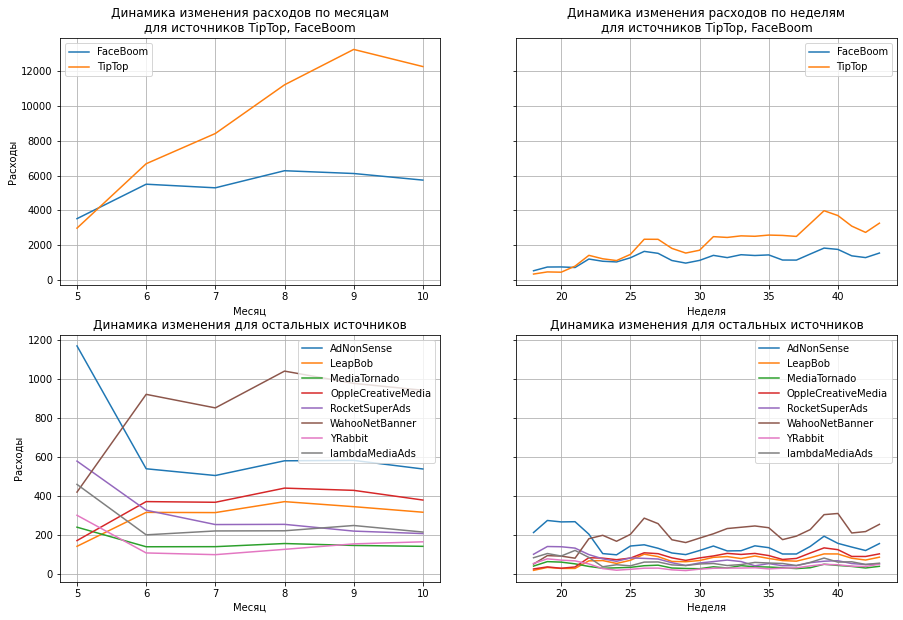

In [29]:
# Создадим новый датасет и добавим туда данные из profiles без источника organic
dynam_cost_chan = profiles.query('channel != "organic"')
# Добавим новые сдолбцы с месецами и неделями
dynam_cost_chan['dynam_cost_m'] = dynam_cost_chan['first_ts'].dt.month
dynam_cost_chan['dynam_cost_w'] = dynam_cost_chan['first_ts'].dt.isocalendar().week
# задаём размер сетки для графиков
plt.figure(figsize=(15, 10))
# в таблице графиков — два столбца и две строки, четыре ячейки
# в первой строке строим кривые динамики изменения источников лидирующих по затратам на маркетинг
ax1 = plt.subplot(2, 2, 1)
dynam_cost_chan.query('channel == "TipTop" | channel == "FaceBoom"')\
               .pivot_table(index = 'dynam_cost_m', columns = 'channel',\
                            values = 'acquisition_cost', aggfunc = 'sum')\
               .plot(grid = True, ax = ax1)
plt.legend()
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.title('Динамика изменения расходов по месяцам\n' + 'для источников TipTop, FaceBoom')
# вертикальная ось — от графика из первой ячейки
ax2 = plt.subplot(2, 2, 2, sharey = ax1)
dynam_cost_chan.query('channel == "TipTop" | channel == "FaceBoom"')\
               .pivot_table(index = 'dynam_cost_w', columns = 'channel',\
                            values = 'acquisition_cost', aggfunc = 'sum')\
               .plot(grid = True, ax = ax2)
plt.legend()
plt.xlabel('Неделя')
plt.title('Динамика изменения расходов по неделям\n' + 'для источников TipTop, FaceBoom')
# во второй строке строим кривые динамики изменения остальных источников
ax3 = plt.subplot(2, 2, 3)
dynam_cost_chan.query('channel != "TipTop" & channel != "FaceBoom"')\
               .pivot_table(index = 'dynam_cost_m', columns = 'channel',\
                            values = 'acquisition_cost', aggfunc = 'sum')\
               .plot(grid = True, ax = ax3)
plt.legend()
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.title('Динамика изменения для остальных источников')

ax4 = plt.subplot(2, 2, 4, sharey = ax3)
dynam_cost_chan.query('channel != "TipTop" & channel != "FaceBoom"')\
               .pivot_table(index = 'dynam_cost_w', columns = 'channel',\
                            values = 'acquisition_cost', aggfunc = 'sum')\
               .plot(grid = True, ax = ax4)
plt.legend()
plt.xlabel('Неделя')
plt.title('Динамика изменения для остальных источников');

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Замечательно, что для того, чтобы внимательнее изучить колебания затрат по каналам ты строишь несколько графиков по размеру значений. Через спринт расскажут про библиотеку `plotly`, она позволяет строить интерактивные графики, как раз в данном случае она была бы очень уместна, позволила бы убирать некоторые каналы, чтобы внимательнее анализировать с меньшим бюджетом, вот [ссылка](https://habr.com/ru/post/502958) если интересено</div>

По построенным кривым видно, что в динамики со временем затраты на рекламу возростают у двух источников, TipTop и FaceBoom, что нельзя сказать о остальных источниках, так как они остаются на одном уровне ниже 5% трат.

#### Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [30]:
# Выполним срез и уберем источник 'organic'
cac_channel = profiles.query('channel != "organic"')
# Отобразим стоимость привлечения одного клиента для каждого источника
cac_channel.pivot_table(index='channel', \
                        values='acquisition_cost', aggfunc='mean')\
           .sort_values(by= 'acquisition_cost', ascending = False)

,acquisition_cost
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


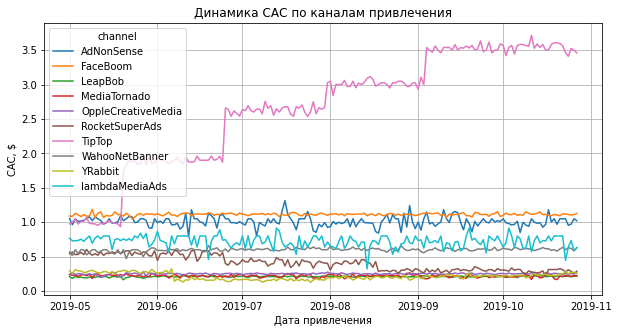

In [31]:
# Для наглядности отобразим CAC на кривой для каждого источника по дате привлечения
cac_channel.pivot_table(index='dt', columns='channel', \
                        values='acquisition_cost', aggfunc='mean')\
        .plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Хочу обратить твоё внимание на изменение `CAC` Tip Top, посмотри ниже на динамику `CAC` по всему проекту, увидишь схожую динамику, это вклад `Tip Top`

</div>

Стоимость привлечения  одного клиента для источника TipTop самые большие, и видно, что траты росли, так же выделяются FaceBoom и AdNonSense, но расход более стабильный. Все остальные источники выгодней обходятся, возможно на эти источники нужно обратить внимание, вдруг они окупят компанию и будут выгоднее всего. Стоило бы сократить траты на TipTop и выровнить расход ближе к среднему значению относительно остальных источников.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

Реклама для пользователей источника organic явно неэффективна, траты нулевые. Возможно у компании есть другой способ привлечения пользователей. Поэтому убирем органических пользователей из анализа.

#### Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

Установим момент и горизонт анализа данных. Предположим, что на календаре 1 ноября 2019 года, и зададим двух недельный горизонт анализа.

In [32]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

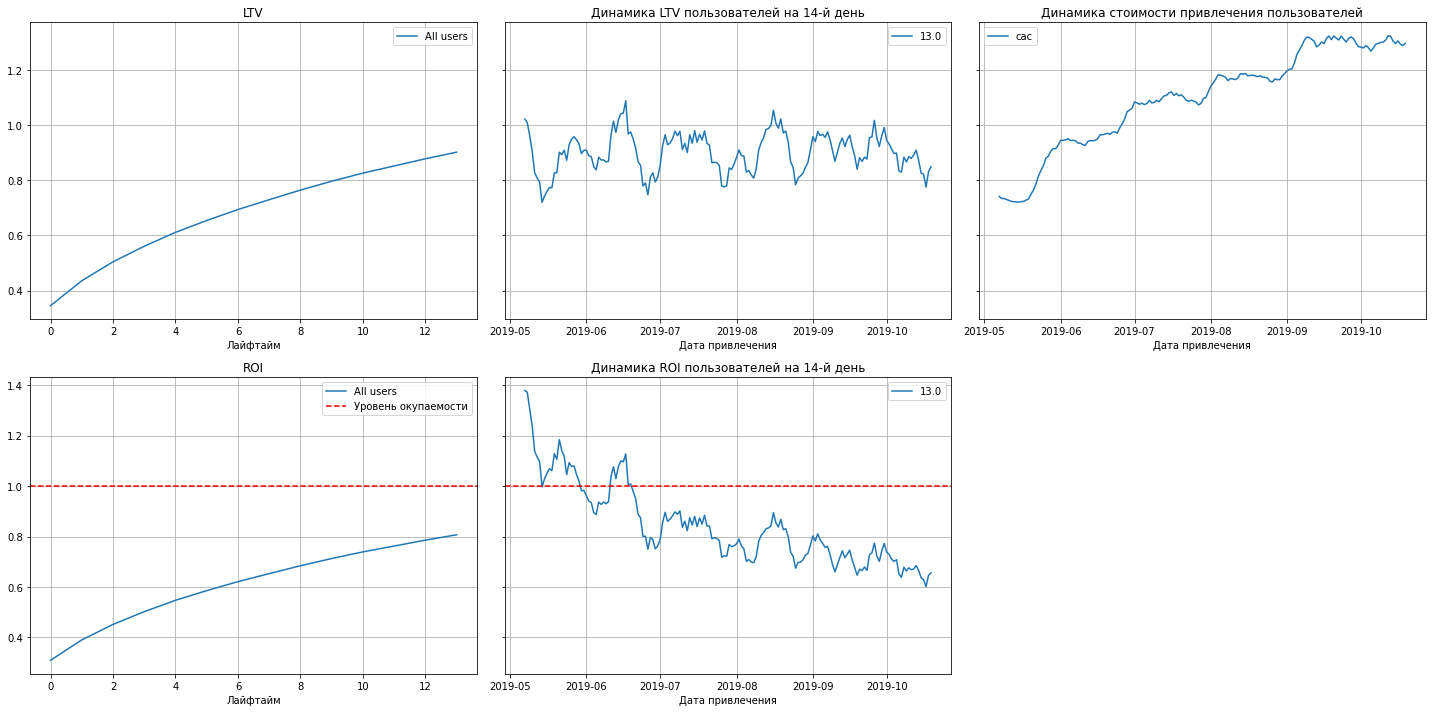

In [33]:
profiles = profiles.query('channel != "organic"')
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Стабильность `LTV` и рост `CAC`, может говорить о росте конкуренции на канале или увеличением бюджета по каналу.</div>

По графикам можно сделать такие выводы:

* На LTV не влияет сезонный фактор, но и этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.
* Реклама не окупается. ROI в конце недели — чуть выше 80% и не достигает уровень окупаеммости.
* Динамика стоимости привлечения (CAC) растет,  дело в увеличении рекламного бюджета.
* Инвестиции перестают окупатся в июне месяце.

Чтобы разобраться в причинах, пройдём по всем доступным характеристикам пользователей — конверсии пользователей и динамики её изменения, удержанием пользователей, стране, источнику и устройству первого посещения.

#### Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.

Посчитаем и визуализируем конверсию и динамику ее изменения, вызвав функции get_conversion() и plot_conversion().

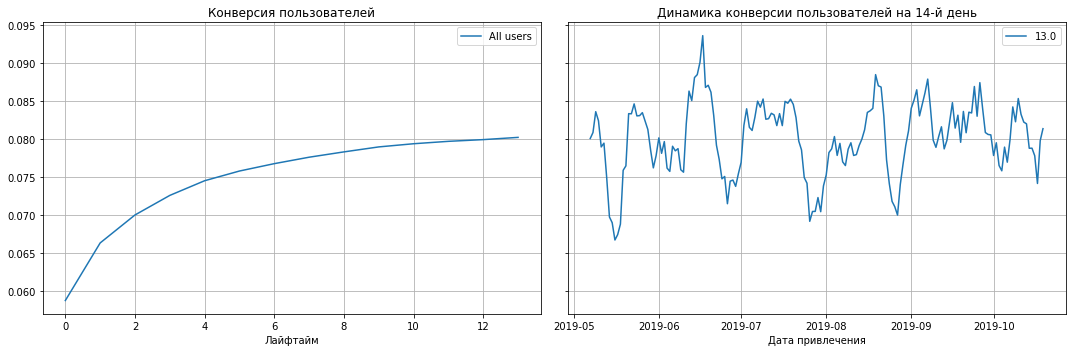

In [34]:
# смотрим конверсию и ее динамику
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

По графикам видно, что пользователи конвертируются хорошо, и постоянно. Посмотрим на удержание пользователей.

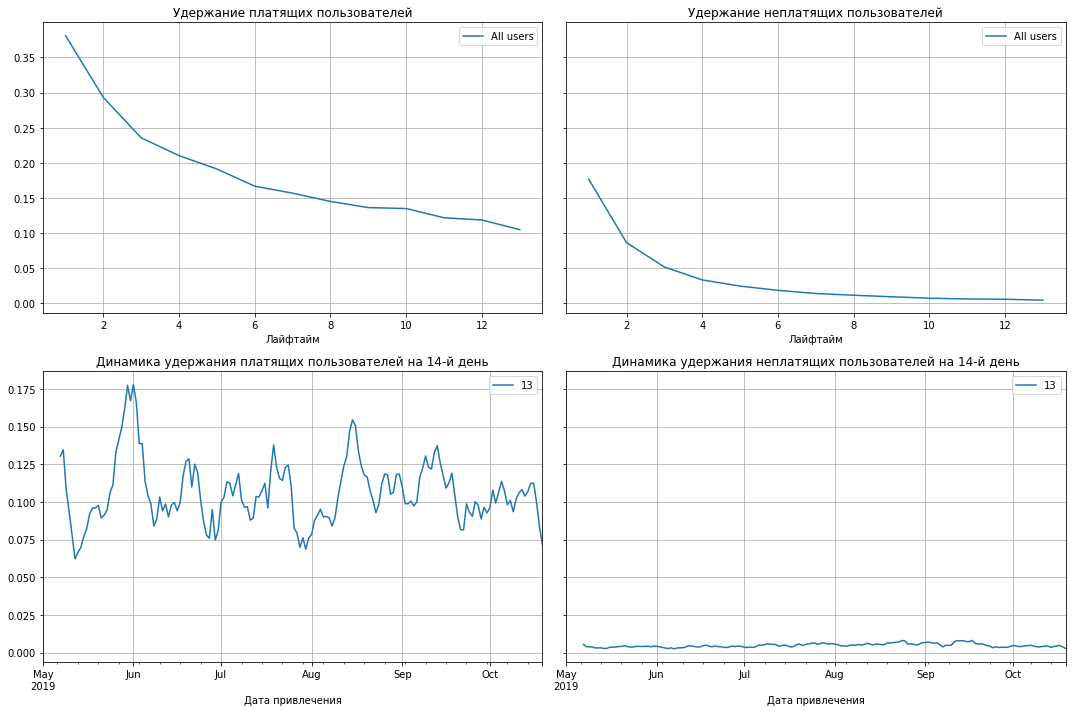

In [35]:
# смотрим удержание 
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)
plot_retention(retention_grouped, retention_history, horizon_days) 

Кривая удержания платящих пользователей выше чем у неплатящих, также обе кривые постепенно снижаются и стремятся к нулю. Платящие пользователи лучше удерживаются. 
На графиках динамики удержания на 14 день видно, что платящие пользователи стабильно держутся. Удержание неплатящих пользователей близки.
Чтобы разобраться в причинах, пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения.

#### Проверим конверсию пользователей и динамику её изменения по устройствам. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.¶

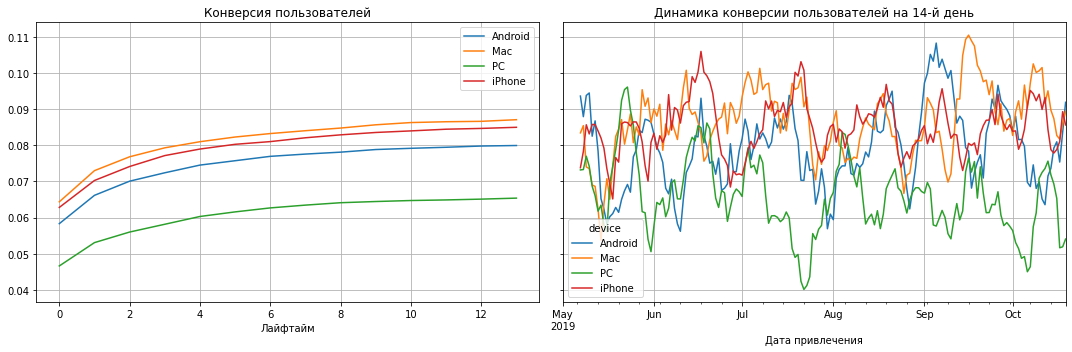

In [36]:
# смотрим конверсию и ее динамику по устройствам
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions = dimensions
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

У устройства pc наблюдается три больших провала в начале и конце лета, а также в начале октября.

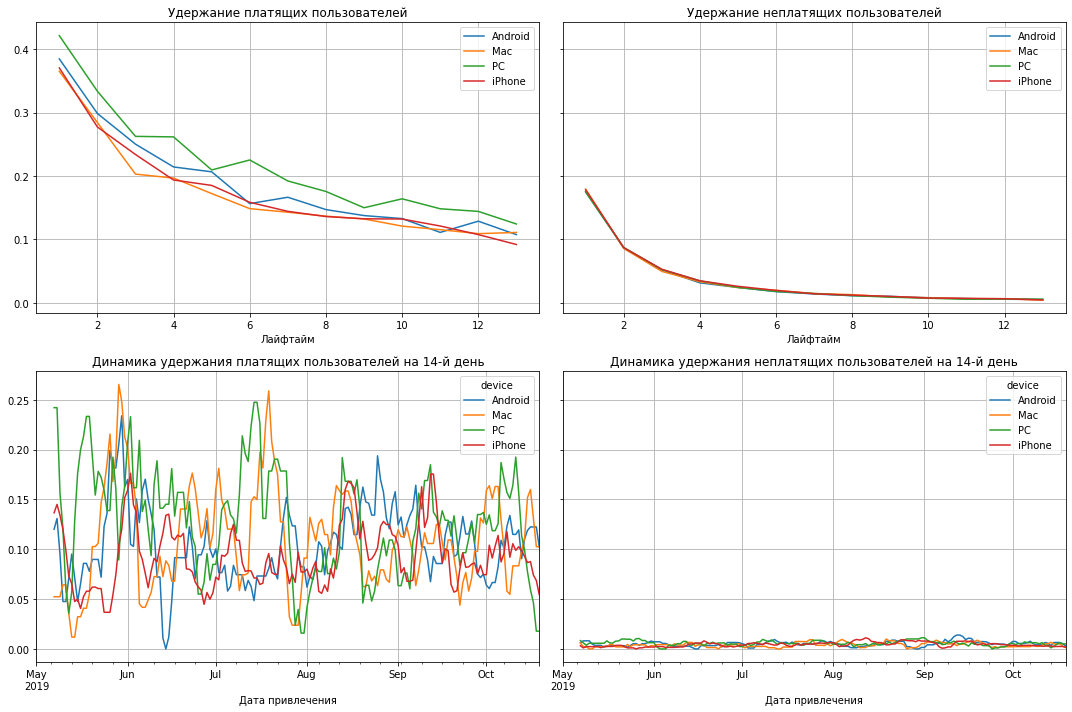

In [37]:
# смотрим удержание 
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = dimensions
)
plot_retention(retention_grouped, retention_history, horizon_days) 

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Обрати внимание, что удержание неплатящих пользователей из разных каналов, стран, платформ ровное, а удержание платящих очень отличается, как считаешь почему так?
</div>

Удержание платящих пользователей выше чем у неплатящих, выделяются устройства pc и android - эти устройства лучше удерживаются. Есть сходство с общим удержанием.

#### Проверим конверсию пользователей и динамику её изменения по странам. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.¶

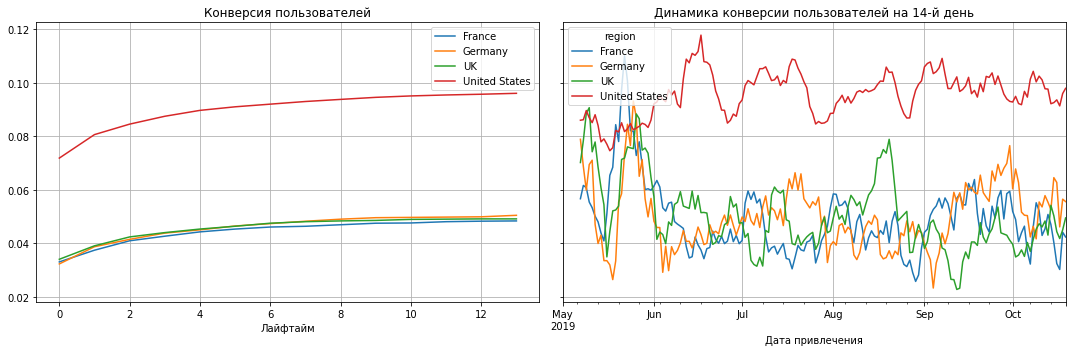

In [38]:
# смотрим конверсию и ее динамику по странам
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions = dimensions
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия пользователей из страны US больше в 2 раза, есть сходства с конверсией устройств iphone и mac.

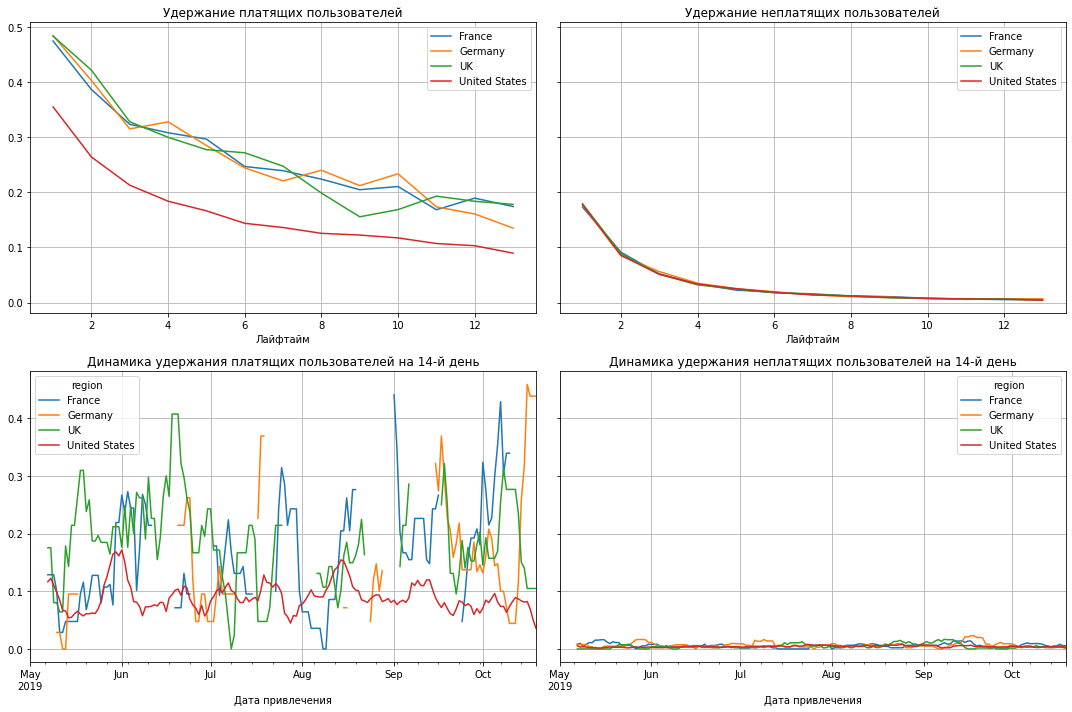

In [39]:
# смотрим удержание 
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = dimensions
)
plot_retention(retention_grouped, retention_history, horizon_days) 

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Существенная проблема - плохое удержание в US, можно было подробнее посмотреть на всех ли каналах, которые приводят трафик в US, такая ситуация, анонсирую, что два самых крупных канала приводят трафик только из US, если захочешь, можешь поисследовать. Любопытно, что динамика конверсии `US` становится с течением времени не такой волатильной. </div>

Удержание пользователей из страны US самое низко из всех, так же имеется сходства, и незначительно больше чем у неплатящих.

#### Проверим конверсию пользователей и динамику её изменения по рекламным каналам. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.¶

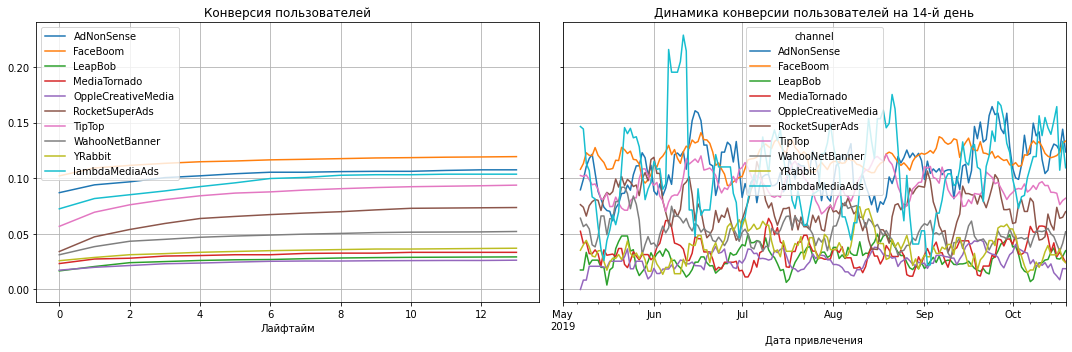

In [40]:
# смотрим конверсию и ее динамику по каналам
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions = dimensions
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия у всех источников разная, самые  конвертирующиеся это FaceBoom, AdNonSense, LambdaMediaAds, TipTop. 

In [ ]:
# смотрим удержание 
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = dimensions
)
plot_retention(retention_grouped, retention_history, horizon_days) 

Плохое удержание пользователей у источников FaceBoom и AdNonSense.

#### Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [ ]:
# смотрим окупаемость рекламы с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Хочу акцентировать твоё внимание на способе решения в данном случае комплексной задачи - неокупаемость маркетинга. Мы эту составную проблему раскладываем на частные причины, декомпозируем весь трафик по странам, устройствам, регионам и ищем где конкретно и в какой момент случилась проблема. 
</div>

С разбивкой по устройствам видно, что не все так хорошо.

По данным графикам:

   * Реклама не окупается у всех, кроме устройство пользователи которые используют PC.
   * Стоимость привлечения у всех устройств растет. У устройства pc и android  стоимость привлечения ниже остальных и ближе к стабильному.
   * LTV стабилен, пользователи pc приносят меньше дохода чем остальные источники
   
Лучше всего окупается pc.

#### Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI

In [ ]:
# смотрим окупаемость рекламы с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Хочу обратить внимание на сходство стоимости привлечения `US` и `Tip Top` это неспроста)

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавил к выводу о графиках окупаемости рекламы .</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

Отлично, удалось выяснить ещё пару проблем окупаемости крупных сегментов 
</div>

По данным графикам:
    
* По LTV видно, что US приносит больше всех остальных стран денег
* Стоимость привлечения у US растет в прогрессии, но при больших затрат на рекламу, US не окупается (ROI). Остальные страны тратят мало и держут стабильность в затратах.
* Пользователи UK, Germany и France стабильно окупаются.

#### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [ ]:
# смотрим окупаемость рекламы с разбивкой по источникам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Чудеса декомпозиции,  отличный подход, который всегда приведёт к успеху, разобрались с LTV И ROI, получили явную проблему в US и TIp Top с Faceboom, при учете, что US - страна с наибольшим количеством пользователей, а Tip TOp и FaceBoom - крупнешие каналы для нас это важные находки, дальше с которыми стоит работать</div>


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Прошу ещё рассчитать конверсию и удержание по каналам, странам, устройствам, это дополнительная детализация позволит выявить проблемы окупаемости. И дополнит выводы, после чего я докомментирую работу
</div>

По данным графикам:

* Доход компании от всех рекламных каналов имеет различия.
* Динамика стоимости привлечения растет в прогрессии у канала TipTop, остальные держут стабильность, но значительно различаются в затратах.
* Из всех каналов не окупаются лишь три - это TipTop, AdNonSense и FaceBoom.
* Видна схожесть в стоимости привлечения пользователей у страны US и рекламного канала TipTop, это связанно с тем что большая часть пользователей из US привлекаются с канала TipTop.

Ответьте на такие вопросы:

* Окупается ли реклама, направленная на привлечение пользователей в целом?

* Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?

* Чем могут быть вызваны проблемы окупаемости?

Ответ:

* Реклама не окупается. ROI в конце недели — чуть выше 80% и не достигает уровень окупаеммости.
* Явно видно, что на  пользователей  устройства Iphone и mac стоимость привлечения большая, при этом затраты не окупаются, на пользователей из страны US имеют так же большие затраты и также не окупаются, рекламные каналы TipTop, AdNonSense и FaceBoom не окупаются. Все эти пользователи связаны устройства и рекламные каналы из US оказывают негативное влияние на окупаемость рекламы. 
* Большие вложения в рекламный канал TipTop неоправданы, в этом и есть проблема неокупаемости. Нужно вкладывать средства в другие источники привлечения пользователей, к примеру LambdaMediaAds.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.

С мая по июнь на  устройства iphone и mac стоимость привлечения была минимальная, в дальнейшем начала расти, но с ростом затрат не значительно менялась сумма денег, которую  клиенты в среднем приносили компании. Это говорит о неэффективности вложения средств, в данном случае нужно было держать стабильность  затрат на рекламу, которая была в мае. Данные устройства больше всего используют в US. Возможна причина в технических особенностях приложения, но так как у нас нет данных о системных ошибках, мы можем только предпологать, также возможно причина в особенности программной платформы, которую не оптимизировали под устройства Apple.

На рекламный канал TipTop было потраченно самое большое кол-во средств и канал не окупился, рекламная компания оказалась неэффективной, кол-во платящих пользователей составило 1878 чел., это 9.60% платящих пользователей, данной компании нужно было уменьшить расходы на продвижение, и увеличить удержание пользователей. Или отказатся от данного рекламного канала в пользу другого.
- Сформулируйте рекомендации для отдела маркетинга.

Увеличить удержание неплатящих пользователей;

Обратить внимание на пользователей использующих pc и android устройства, так как pc окупается, а android близок к окупаемости.

Увеличить расходы на привлечение пользователей из стран UK и Germany;

Выбрать другие каналы для продвижения, к примеру LambdaMediaAds он приносит хороший доход и стабилен по стоимости продвижения пользователей. Так же обратить внимание на канал FaceBoom, увеличить удержание пользователей путем привлечения пользователей низкого качества.

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
* Критическое замечание исправлено, принимаю проект, ты молодец). Касательно рекомендаций, не хватает связи каналов и стран, ведь пользователь пришедший из `US` пришел с какого-то канала, вот этот кусочек пазла позволит получить общую картину. Ну и я считаю важной рекомендацией - чаще обращать внимания на показатели маркетинга, а то очень похоже, что маркетинговый отдел долгое время сжигал деньги не очень эффективно). В работе я оставил некоторое количество мелких рекомендаций от себя, надеюсь ты из них вынесешь что-то для себя и будешь активно применять в будущих проектах и работе.) 
    
    
* В части по анализу графиков я оставил несколько вопросов, но так как проект я принимаю не хочу оставлять тебя без ответов. В более ровном удержании виновато число пользователей. Когда говорим об удержании платящих, видим величину волатильную, но это не из-за её природы, а из-за того, что наблюдений мало, и каждое отдельное наблюдение существенно влияет на оценку, такая особенность часто может проявляться в анализе, так что рекомендую проверять число наблюдений, чтобы не ошибаться с выводами.
   
* Сейчас работаю аналитиком в отделе закупки игровой компании и US это действительно наибольший рынок, ему достается процентов 30-40 всего трафика, да набор каналов существенно шире, но US доминирует в этом плане. Конечно у нас перед глазами набор дашбордов, которые позволяют контролировать множество всяких метрик, но периодически бывает всякое, конечно же масштабирование канала, который становится всё хуже и хуже - сомнительная идея, а оптимизации происходят существенно чаще, по некоторым каналам раз в неделю, а по некоторым и ещё чаще). Благодарю за совместную работу, желаю удачи!) 
    
</div>